In [ ]:
#import pandas as pd

# Load the Excel file
#file_path = "Book2.xlsx"  # Update with the actual file path
#df = pd.read_excel(file_path, header=None)  # Read without headers

# Split the single column into multiple columns using the delimiter (e.g., comma)
#df_split = df[0].str.split(',', expand=True)  # Assuming CSV format in one column

# Rename columns based on the correct format
#df_split.columns = ["City", "Charging Station ID", "Latitude", "Longitude", "Charger Type", 
#                    "Charging Price (INR/kWh)", "Usage Time Slot", "Daily Users", 
#                    "Charging Duration (mins)", "Energy Consumed (kWh)", "EV Brand"]

# Save the cleaned file (optional)
#df_split.to_excel("cleaned_data.xlsx", index=False)

# Display the first few rows
#print(df_split.head())


In [14]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.8/124.9 MB 11.2 MB/s eta 0:00:11
   - -------------------------------------- 3.7/124.9 MB 11.5 MB/s eta 0:00:11
   -- ------------------------------------- 6.8/124.9 MB 11.3 MB/s eta 0:00:11
   -- ------------------------------------- 9.2/124.9 MB 11.4 MB/s eta 0:00:11
   --- ------------------------------------ 11.5/124.9 MB 11.5 MB/s eta 0:00:10
   ---- ----------------------------------- 13.9/124.9 MB 11.5 MB/s eta 0:00:10
   ----- ---------------------------------- 16.5/124.9 MB 11.6 MB/s eta 0:00:10
   ------ --------------------------------- 18.9/124.9 MB 11.6 MB/s eta 0:00:10
   ------ --------------------------------- 21.2/124.9 MB 11.6 MB/s eta 0:00:09
   ------- -------------------------------- 23.9/124.9 MB 11.5 MB/s eta 0:00:09
   -------- ------------------------------- 26.0/124.9 MB 11.5 MB/s eta 0:00:09
   --------- ------------------------------ 28.6/124.


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb


In [1]:
df1 = pd.read_excel("cleaned_data.xlsx")

In [2]:
df1.head()

,City,Charging_Station_ID,Latitude,Longitude,Charger_Type,Charging_Price(INR/kWh),Usage_Time_Slot,Daily_Users,Charging_Duration(mins),Energy_Consumed(kWh),EV_Brand
0,Bangalore,STN_001,25.985446,75.298398,Fast,15,6 PM - 9 PM,37,36,5.44,Hyundai Kona EV
1,Bangalore,STN_002,28.138660,81.598955,Slow,8,1 PM - 2 PM,69,31,6.95,Tesla Model 3
2,Delhi,STN_003,14.819342,77.371716,Slow,8,1 PM - 2 PM,43,33,16.38,Hyundai Kona EV
3,Pune,STN_004,24.509516,83.598685,Slow,8,1 PM - 2 PM,19,57,30.86,Hyundai Kona EV
4,Hyderabad,STN_005,23.054710,86.178385,Slow,8,6 PM - 9 PM,74,19,24.96,MG ZS EV


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     100 non-null    object 
 1   Charging_Station_ID      100 non-null    object 
 2   Latitude                 100 non-null    float64
 3   Longitude                100 non-null    float64
 4   Charger_Type             100 non-null    object 
 5   Charging_Price(INR/kWh)  100 non-null    int64  
 6   Usage_Time_Slot          100 non-null    object 
 7   Daily_Users              100 non-null    int64  
 8   Charging_Duration(mins)  100 non-null    int64  
 9   Energy_Consumed(kWh)     100 non-null    float64
 10  EV_Brand                 100 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 8.7+ KB


In [4]:
# Compute total charging time in minutes
df1["Total_Charging_Time(mins)"] = df1["Daily_Users"] * df1["Charging_Duration(mins)"]

# Convert to hours
df1["Total_Charging_Time(hours)"] = df1["Total_Charging_Time(mins)"] / 60

# Calculate Downtime (Assuming 24-hour operation)
df1["Downtime(hours)"] = 24 - df1["Total_Charging_Time(hours)"]

# Display the dataset with downtime
print(df1)

         City Charging_Station_ID   Latitude  Longitude Charger_Type  \
0   Bangalore             STN_001  25.985446  75.298398         Fast   
1   Bangalore             STN_002  28.138660  81.598955         Slow   
2       Delhi             STN_003  14.819342  77.371716         Slow   
3        Pune             STN_004  24.509516  83.598685         Slow   
4   Hyderabad             STN_005  23.054710  86.178385         Slow   
..        ...                 ...        ...        ...          ...   
95  Bangalore             STN_096  27.306377  76.943500         Fast   
96    Kolkata             STN_097  13.833792  75.408107         Fast   
97       Pune             STN_098  20.980485  77.395198         Slow   
98    Chennai             STN_099  13.598981  77.596824         Slow   
99     Mumbai             STN_100  13.270551  81.778786         Slow   

    Charging_Price(INR/kWh) Usage_Time_Slot  Daily_Users  \
0                        15     6 PM - 9 PM           37   
1              

In [5]:
df1.head()

,City,Charging_Station_ID,Latitude,Longitude,Charger_Type,Charging_Price(INR/kWh),Usage_Time_Slot,Daily_Users,Charging_Duration(mins),Energy_Consumed(kWh),EV_Brand,Total_Charging_Time(mins),Total_Charging_Time(hours),Downtime(hours)
0,Bangalore,STN_001,25.985446,75.298398,Fast,15,6 PM - 9 PM,37,36,5.44,Hyundai Kona EV,1332,22.200000,1.800000
1,Bangalore,STN_002,28.138660,81.598955,Slow,8,1 PM - 2 PM,69,31,6.95,Tesla Model 3,2139,35.650000,-11.650000
2,Delhi,STN_003,14.819342,77.371716,Slow,8,1 PM - 2 PM,43,33,16.38,Hyundai Kona EV,1419,23.650000,0.350000
3,Pune,STN_004,24.509516,83.598685,Slow,8,1 PM - 2 PM,19,57,30.86,Hyundai Kona EV,1083,18.050000,5.950000
4,Hyderabad,STN_005,23.054710,86.178385,Slow,8,6 PM - 9 PM,74,19,24.96,MG ZS EV,1406,23.433333,0.566667


In [6]:
df1["EV_Brand"].unique()

array(['Hyundai Kona EV', 'Tesla Model 3', 'MG ZS EV', 'BYD E6',
       'Mahindra XUV400', 'Tata Nexon EV'], dtype=object)

In [7]:
# Check for missing values
print("Missing Values: \n", df1.isnull().sum())


Missing Values: 
 City                          0
Charging_Station_ID           0
Latitude                      0
Longitude                     0
Charger_Type                  0
Charging_Price(INR/kWh)       0
Usage_Time_Slot               0
Daily_Users                   0
Charging_Duration(mins)       0
Energy_Consumed(kWh)          0
EV_Brand                      0
Total_Charging_Time(mins)     0
Total_Charging_Time(hours)    0
Downtime(hours)               0
dtype: int64


In [8]:
# Summary statistics for numerical columns
print("\nSummary Statistics:", df1.describe())



Summary Statistics:          Latitude   Longitude  Charging_Price(INR/kWh)  Daily_Users  \
count  100.000000  100.000000               100.000000   100.000000   
mean    19.514770   80.925833                11.360000    52.370000   
std      4.681487    4.747486                 3.514817    25.083962   
min     12.690779   72.589155                 8.000000    11.000000   
25%     15.497093   76.400124                 8.000000    29.000000   
50%     19.165821   80.783651                 8.000000    50.000000   
75%     22.765014   85.115014                15.000000    73.000000   
max     28.787724   88.386817                15.000000   100.000000   

       Charging_Duration(mins)  Energy_Consumed(kWh)  \
count               100.000000             100.00000   
mean                 37.770000              22.15510   
std                  13.177771              10.30735   
min                  15.000000               5.24000   
25%                  28.750000              12.57500   
50%

In [9]:
# Unique values in categorical columns
categorical_cols = ['City', 'Charger_Type', 'EV_Brand', 'Usage_Time_Slot']
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df1[col].unique())



Unique values in City:
['Bangalore' 'Delhi' 'Pune' 'Hyderabad' 'Chennai' 'Kolkata' 'Mumbai']

Unique values in Charger_Type:
['Fast' 'Slow']

Unique values in EV_Brand:
['Hyundai Kona EV' 'Tesla Model 3' 'MG ZS EV' 'BYD E6' 'Mahindra XUV400'
 'Tata Nexon EV']

Unique values in Usage_Time_Slot:
['6 PM - 9 PM' '1 PM - 2 PM']


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


Univariate Analysis:


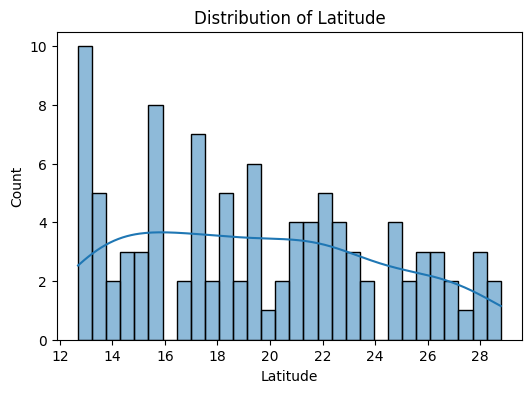

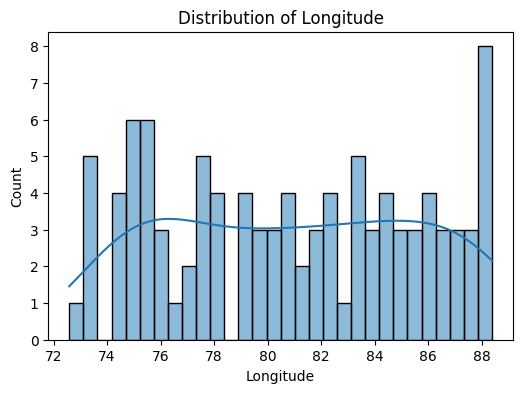

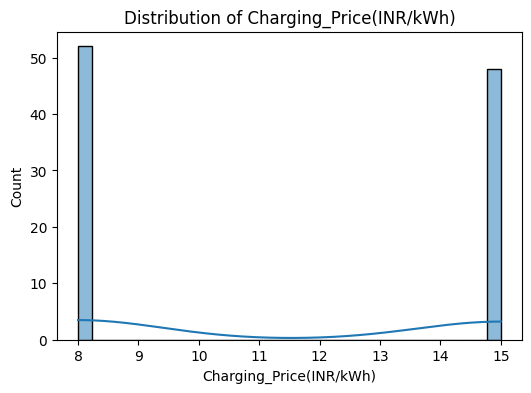

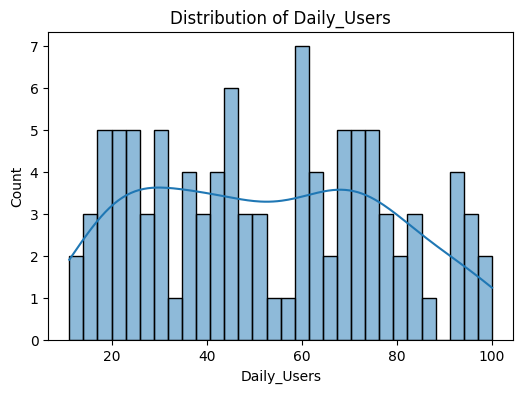

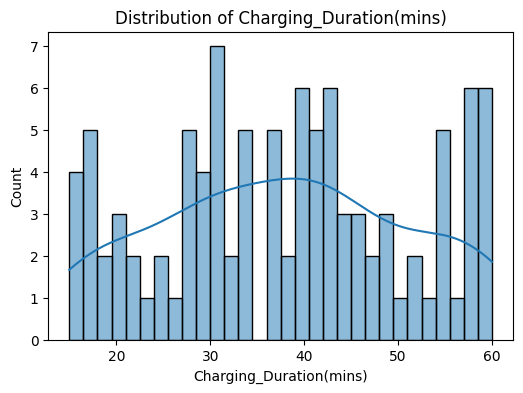

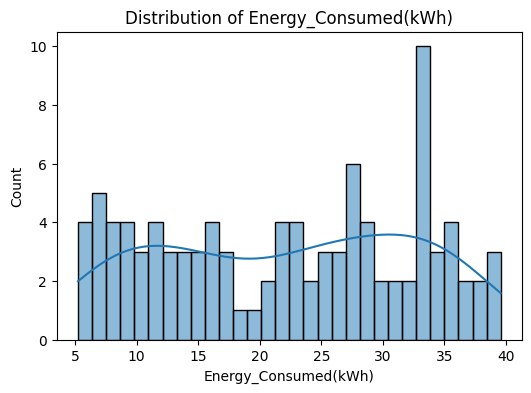

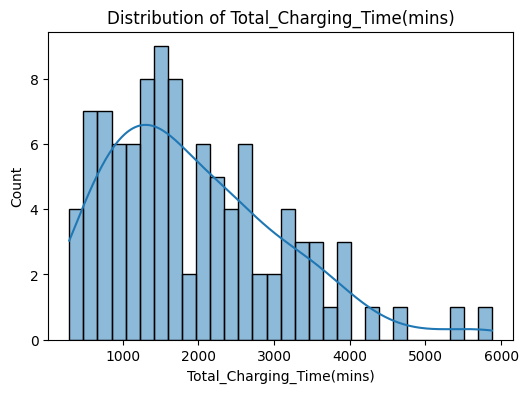

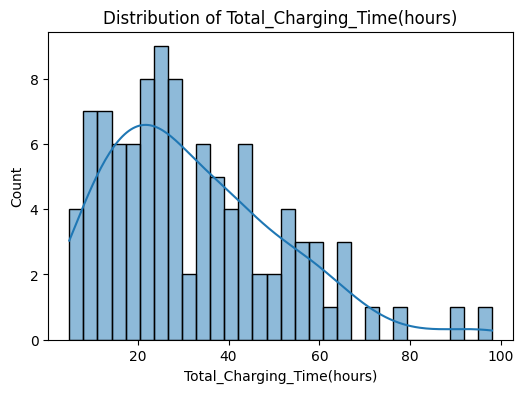

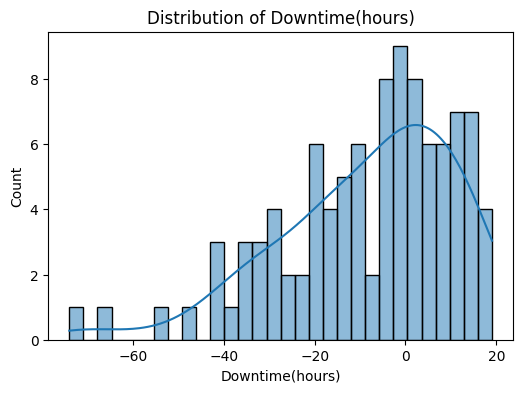

In [11]:
# Univariate Analysis
print("\nUnivariate Analysis:")
for col in df1.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


Bivariate Analysis:


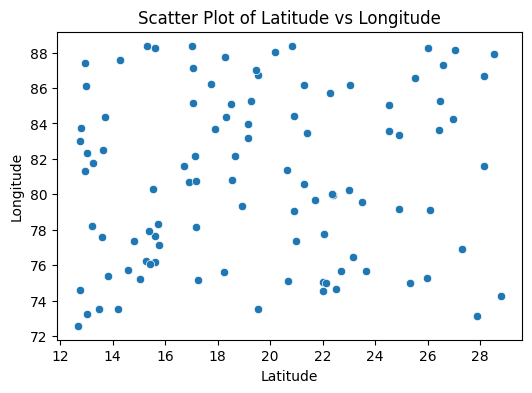

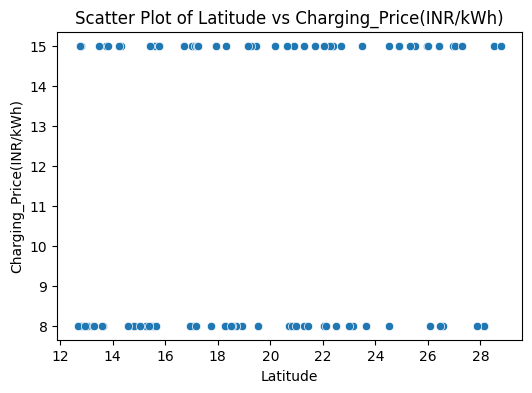

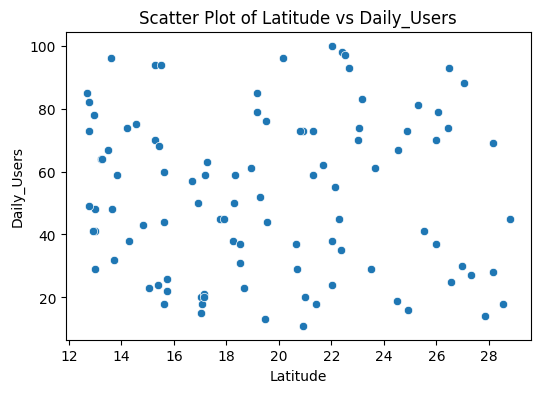

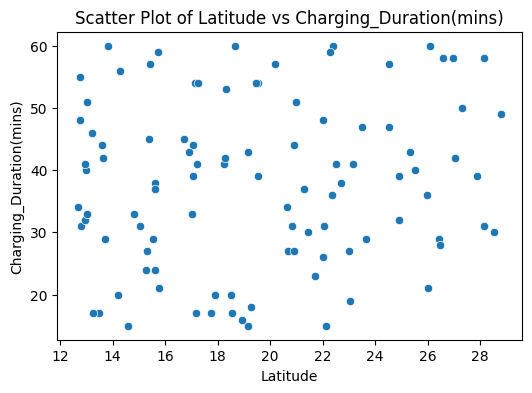

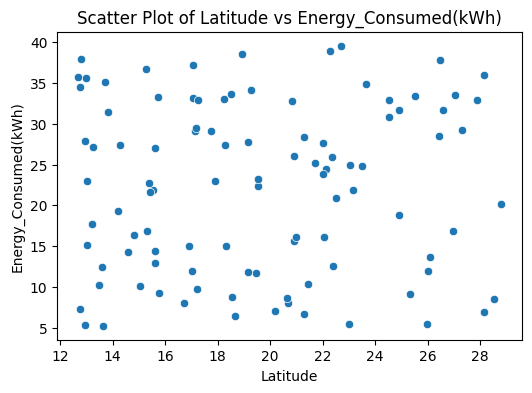

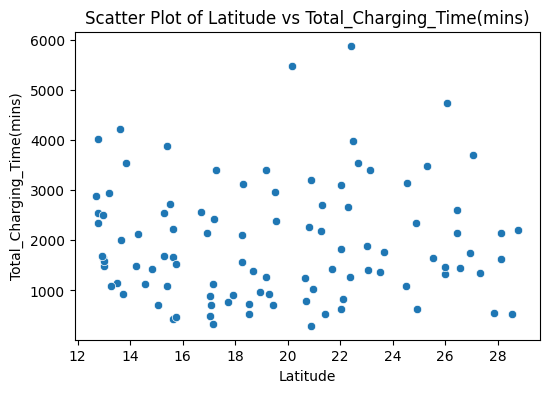

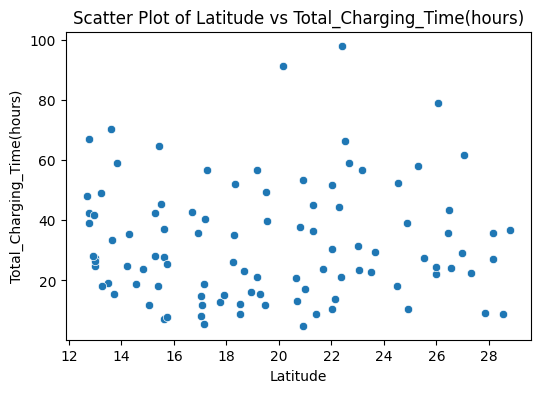

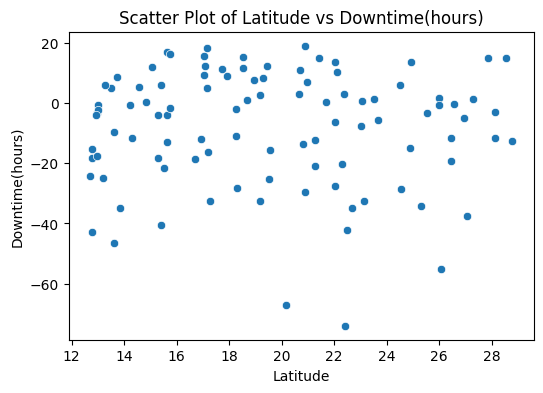

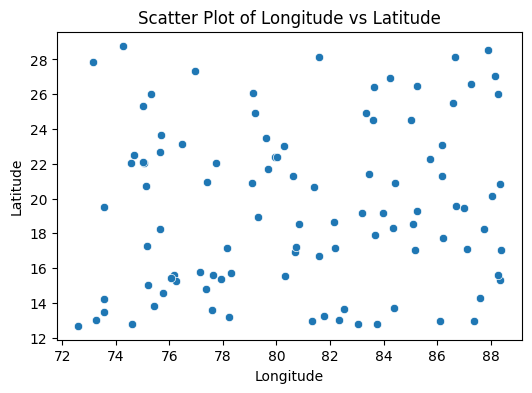

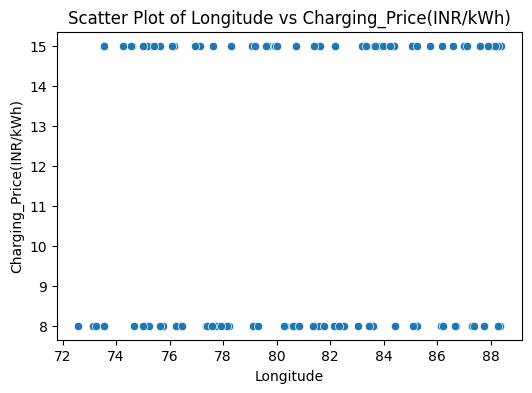

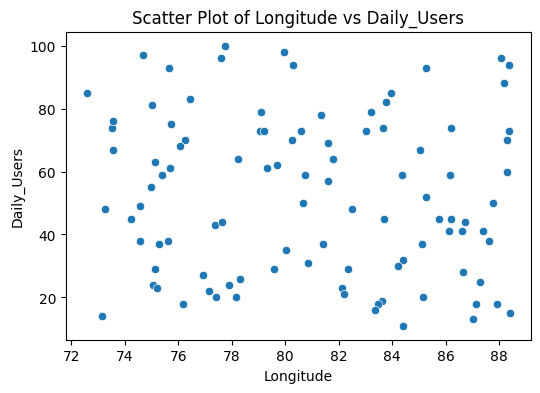

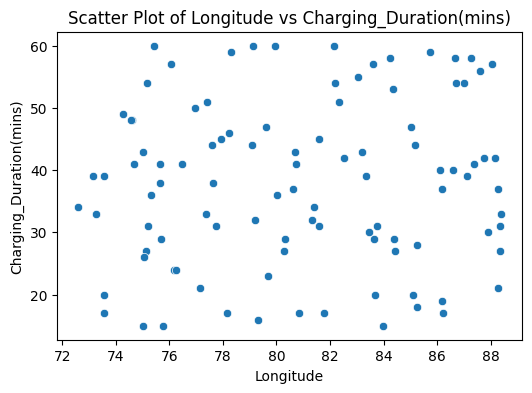

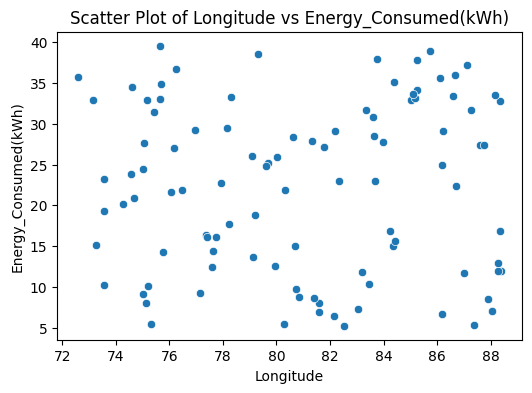

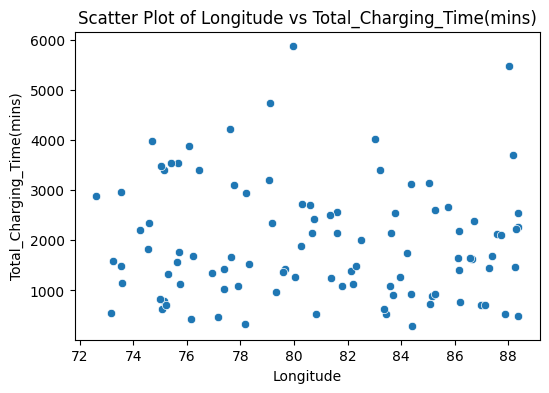

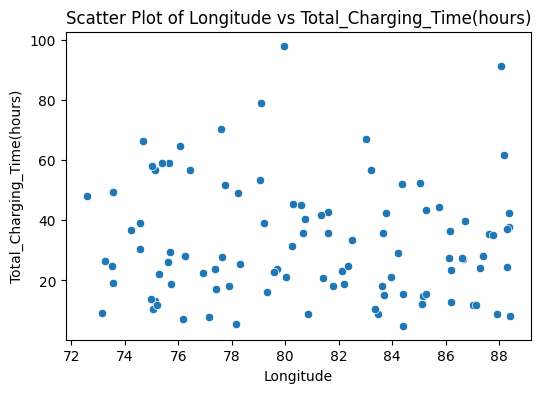

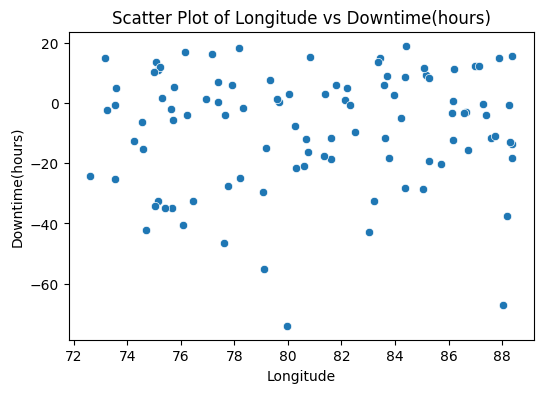

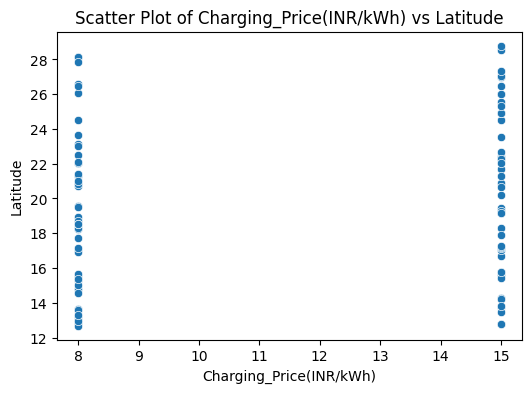

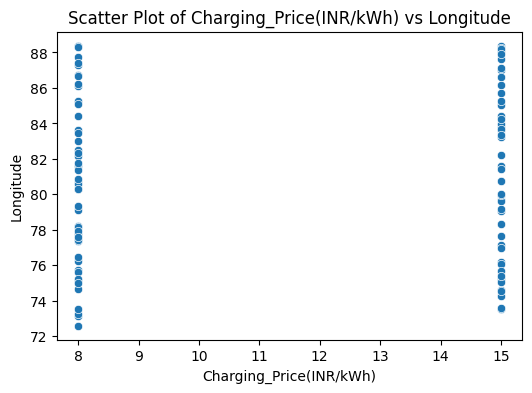

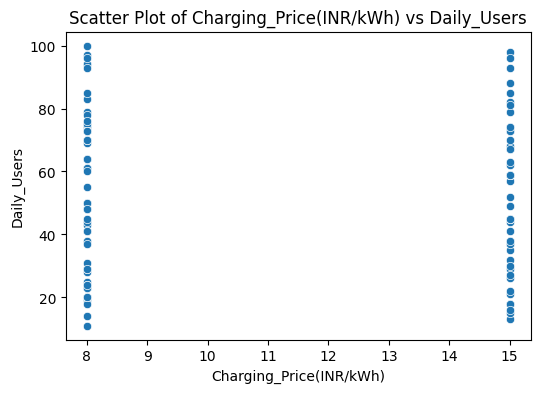

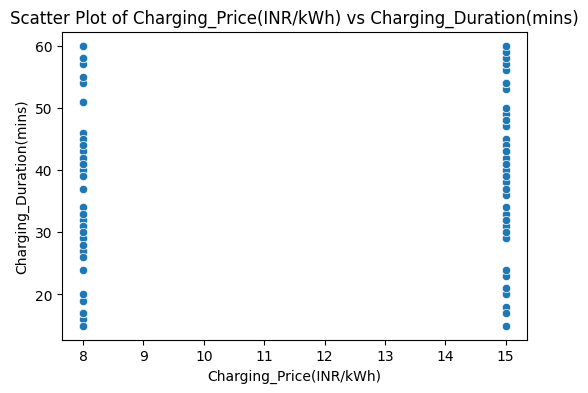

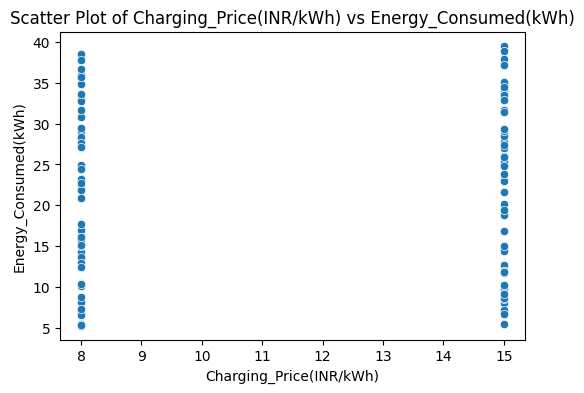

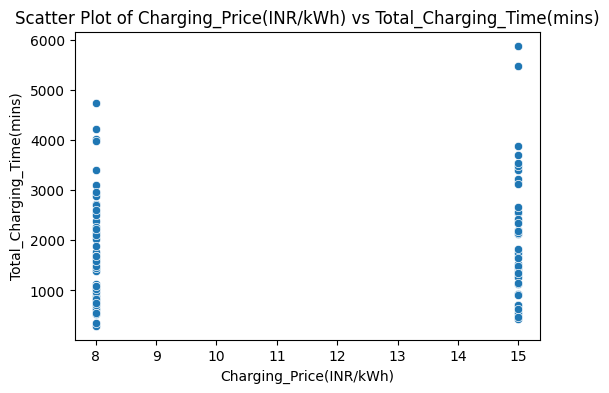

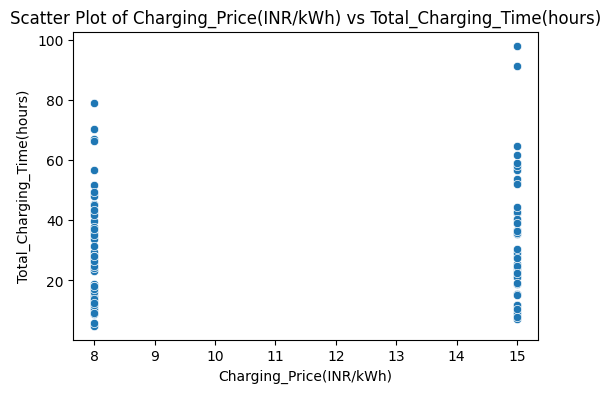

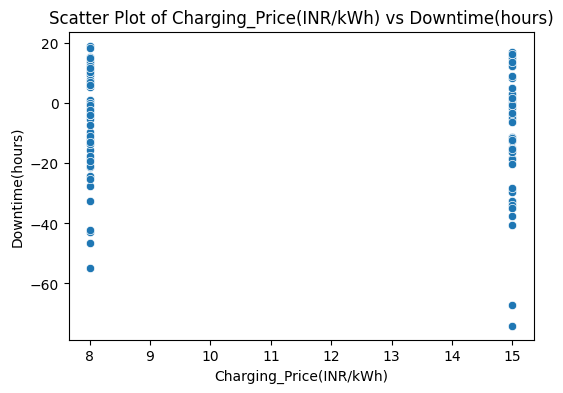

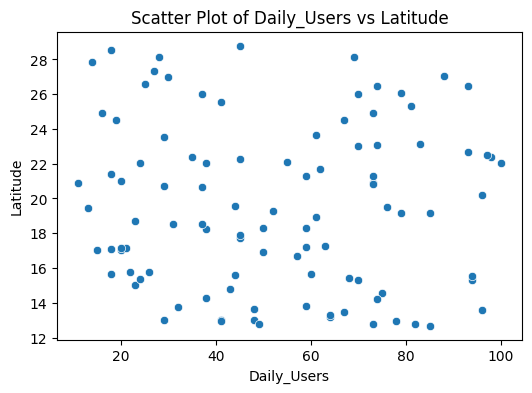

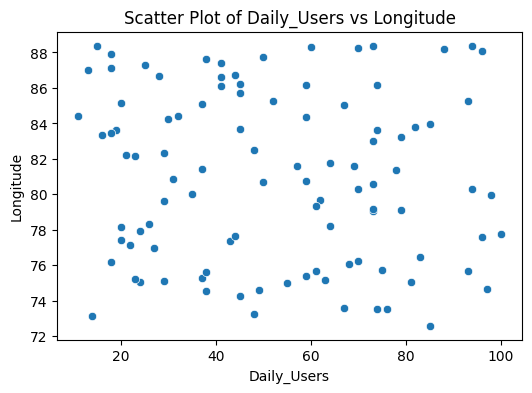

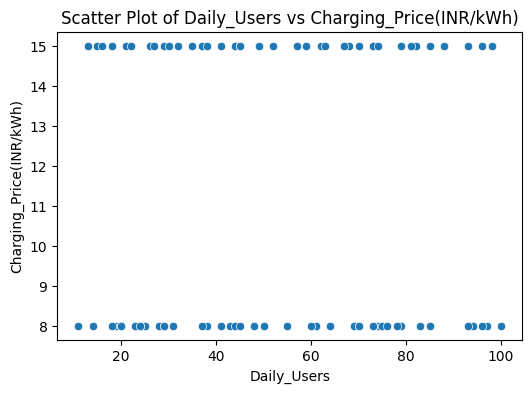

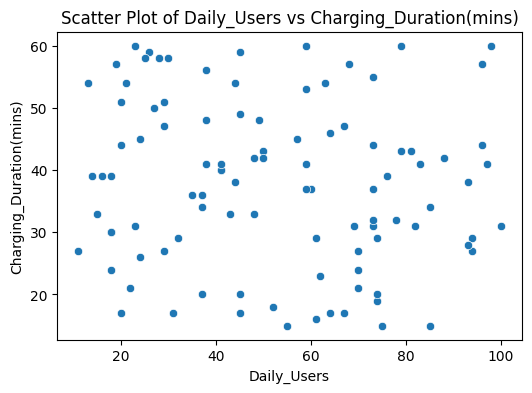

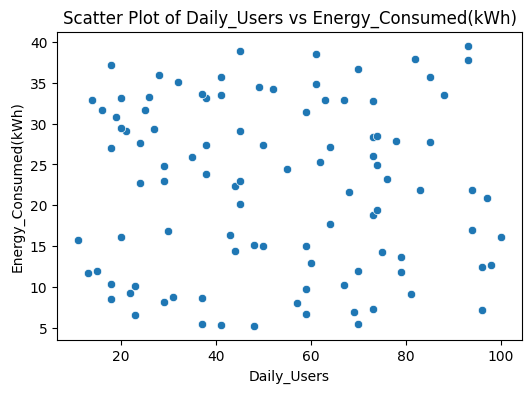

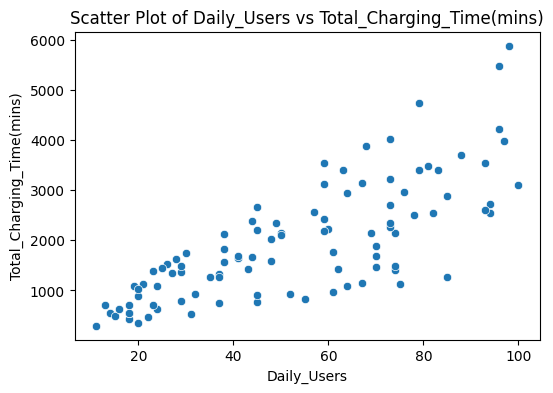

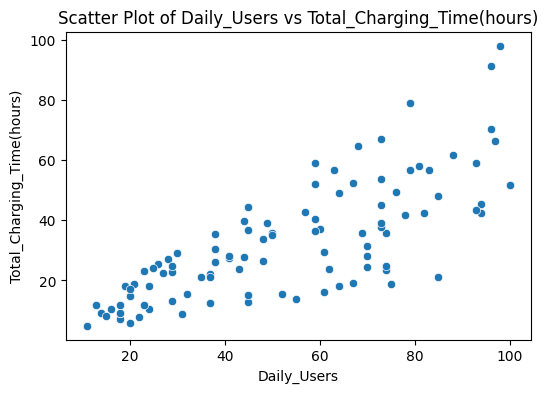

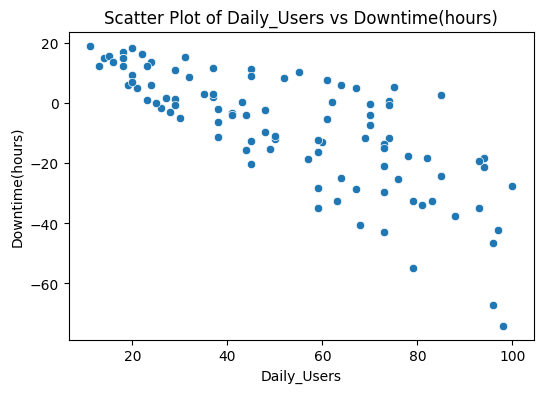

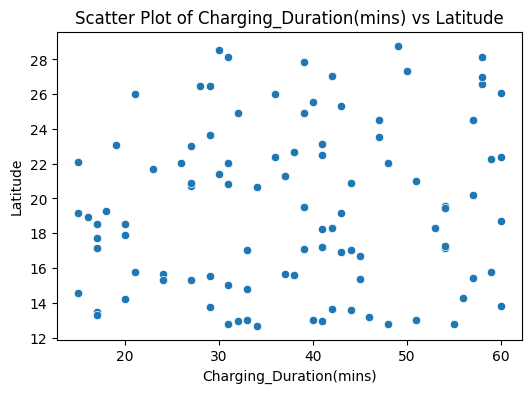

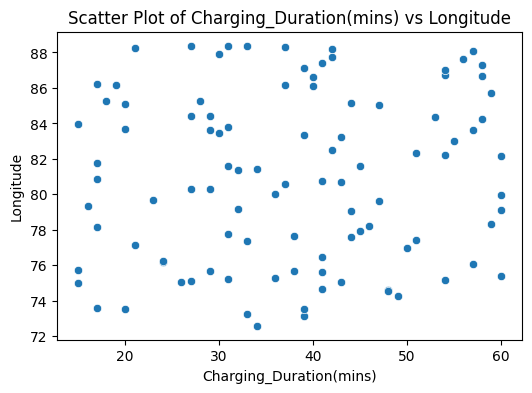

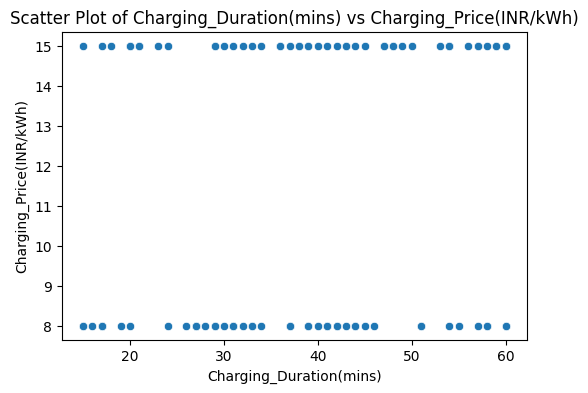

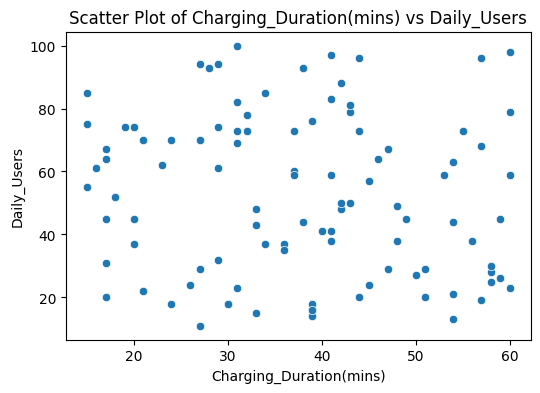

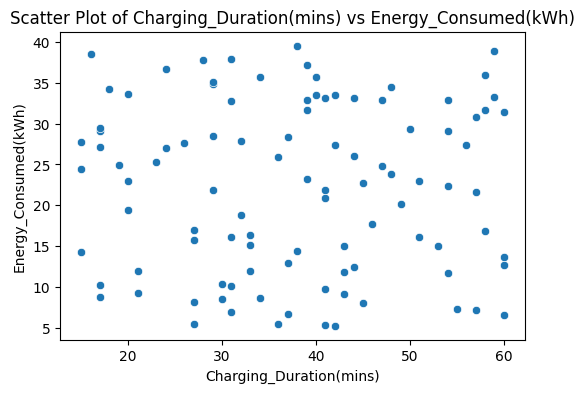

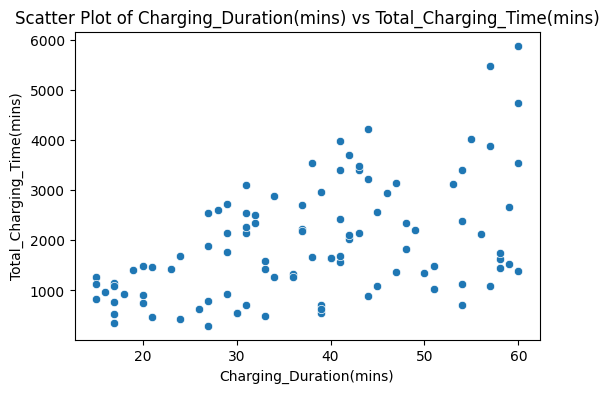

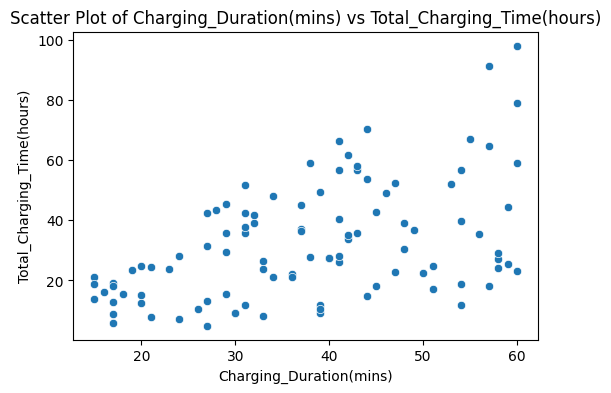

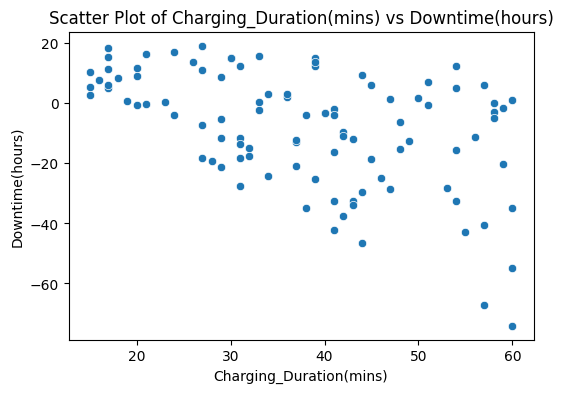

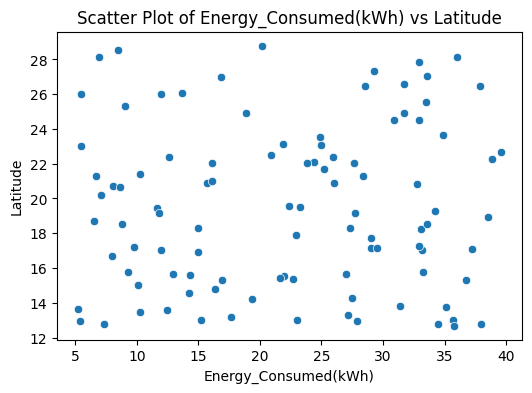

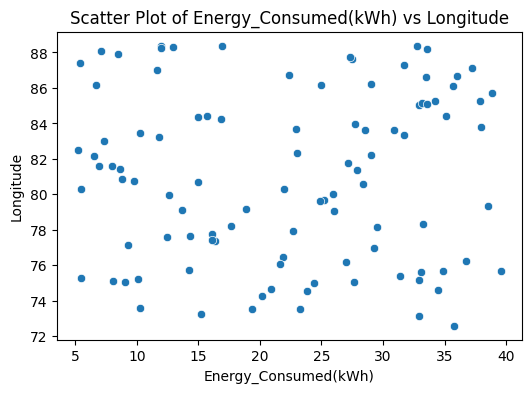

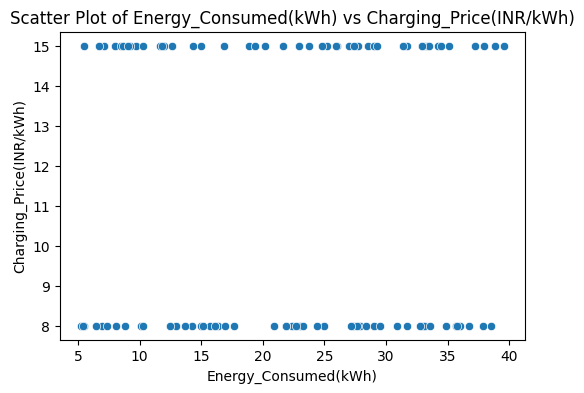

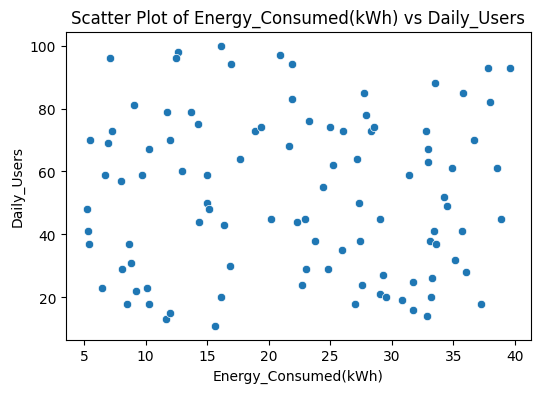

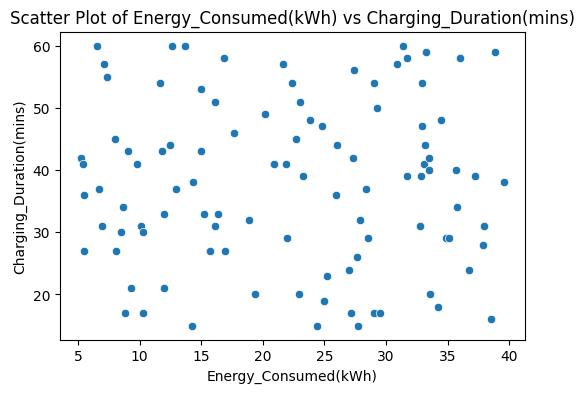

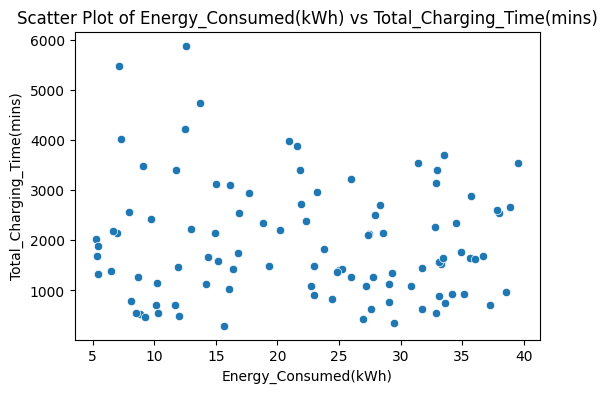

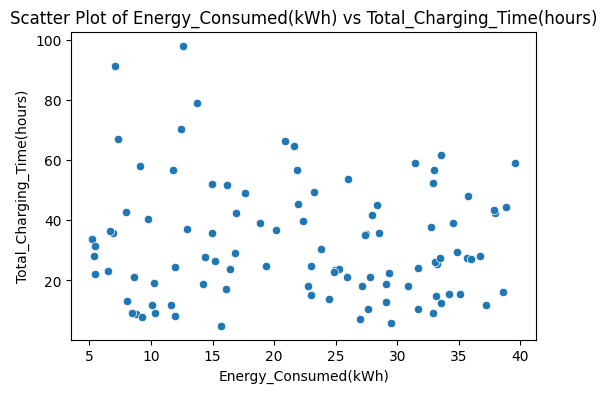

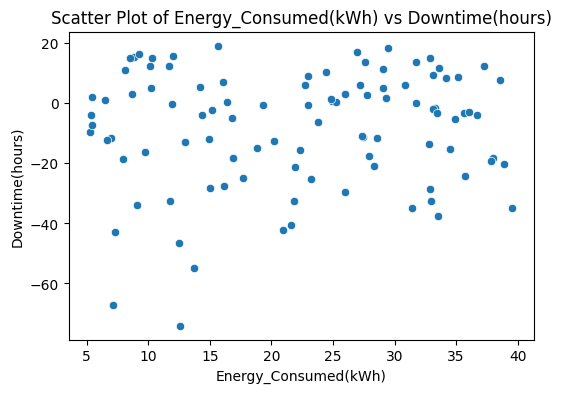

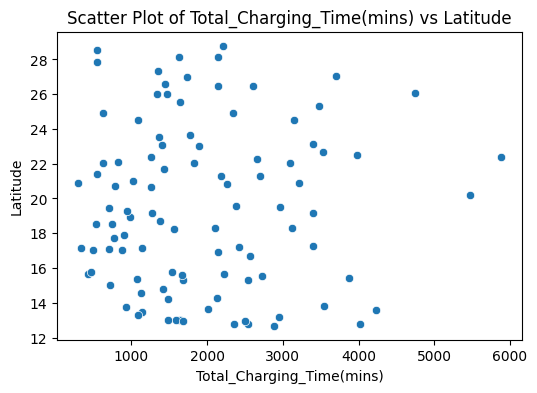

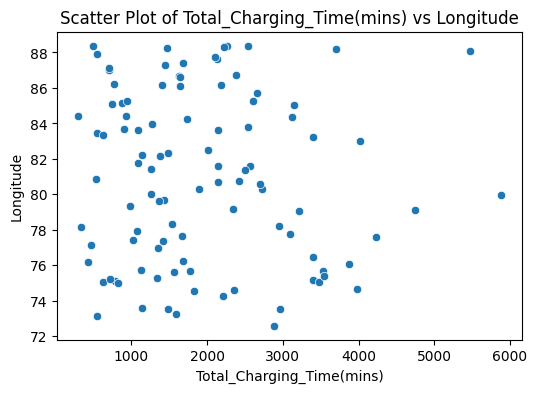

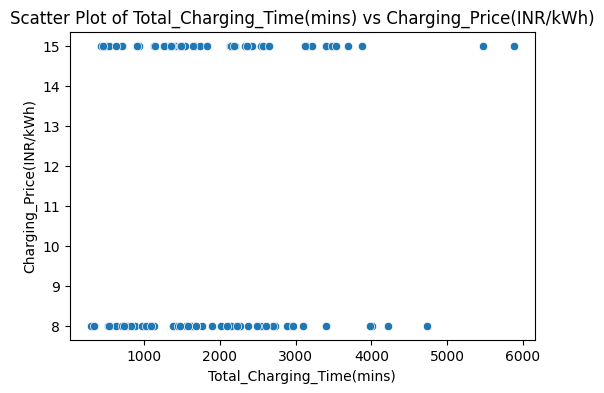

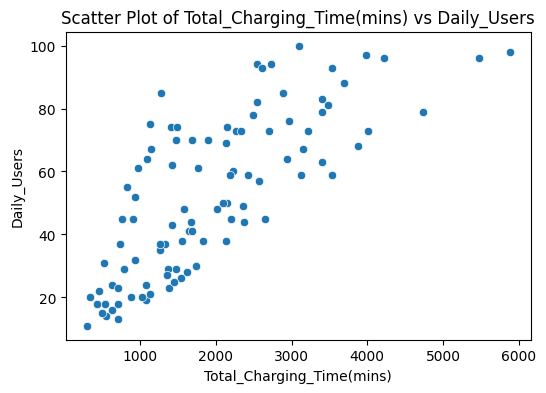

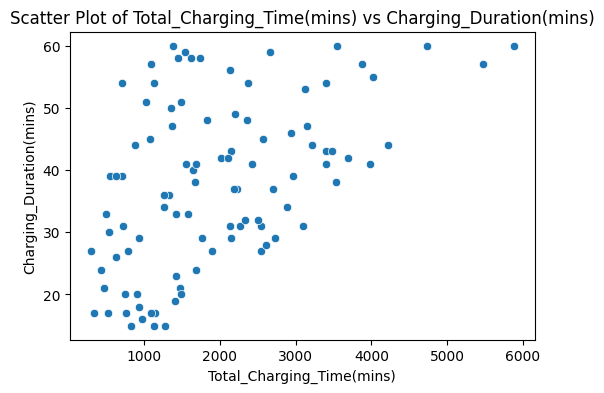

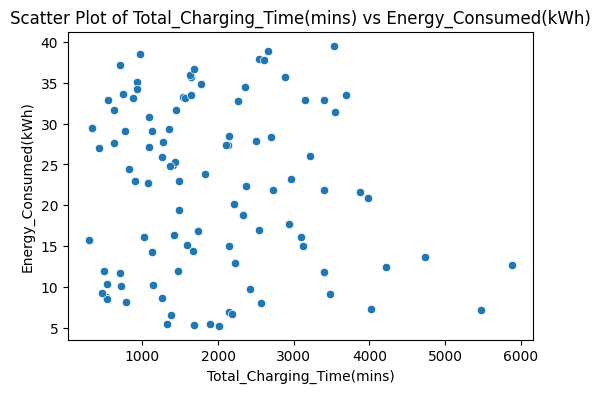

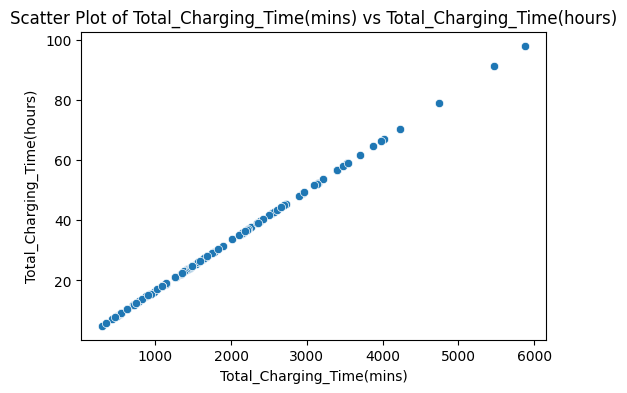

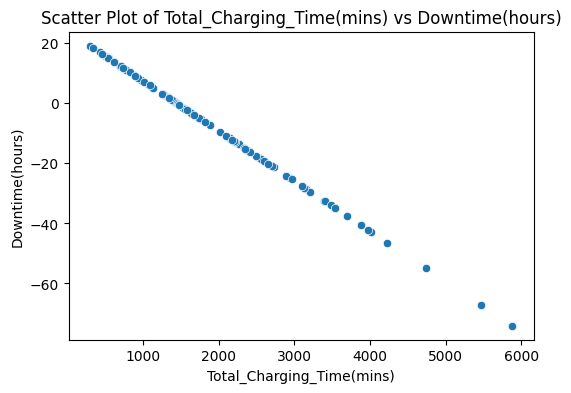

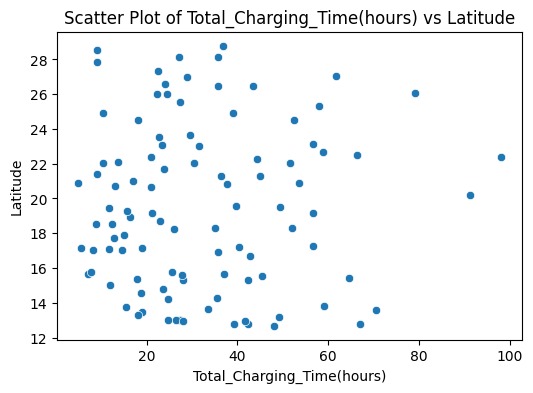

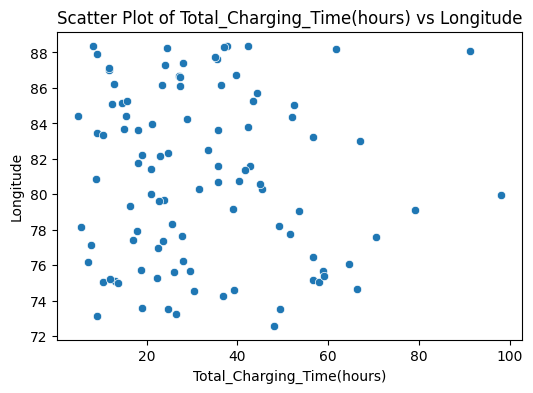

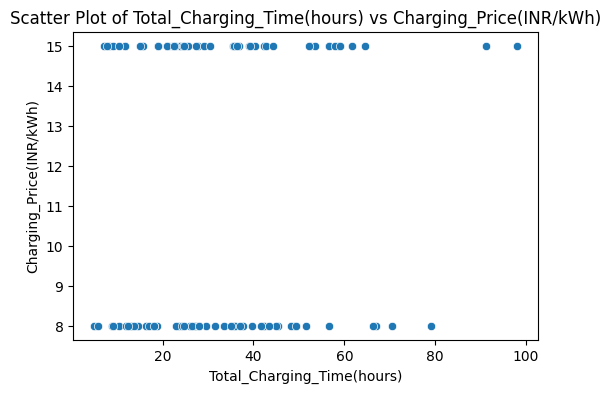

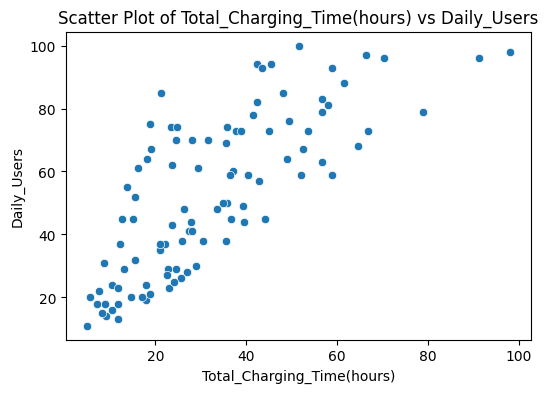

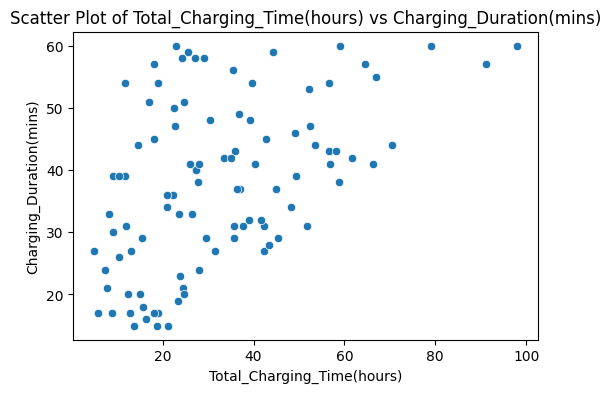

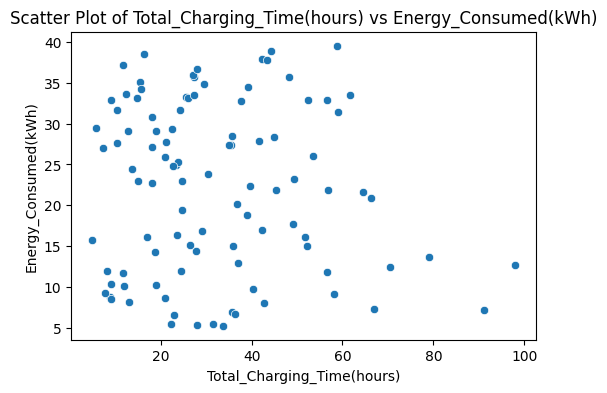

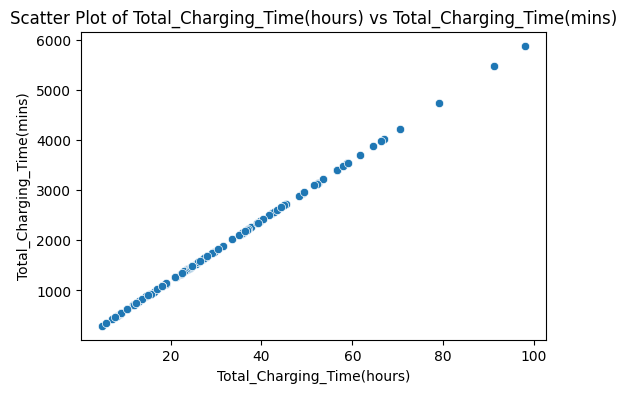

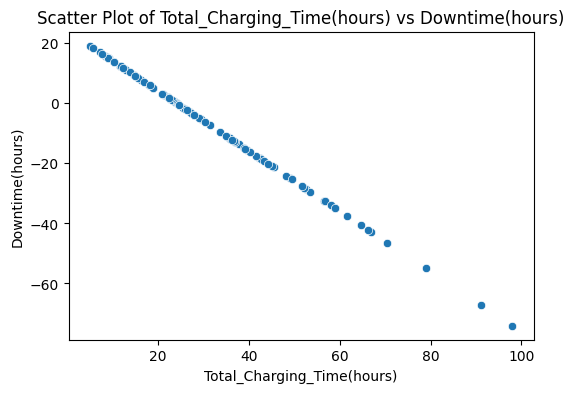

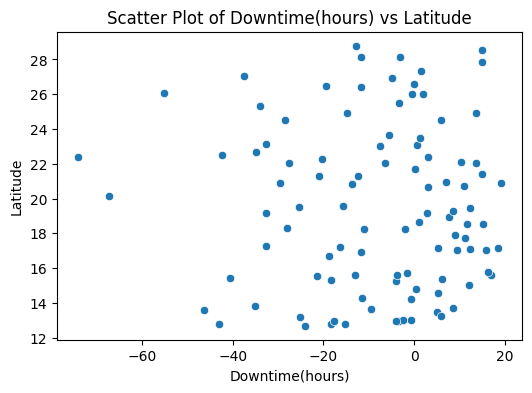

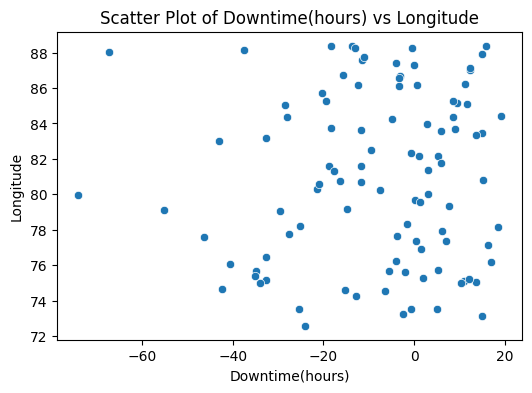

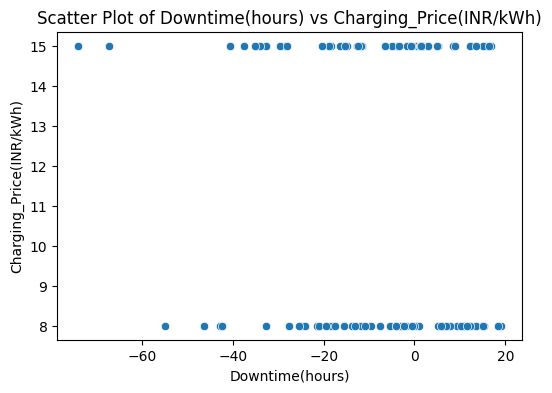

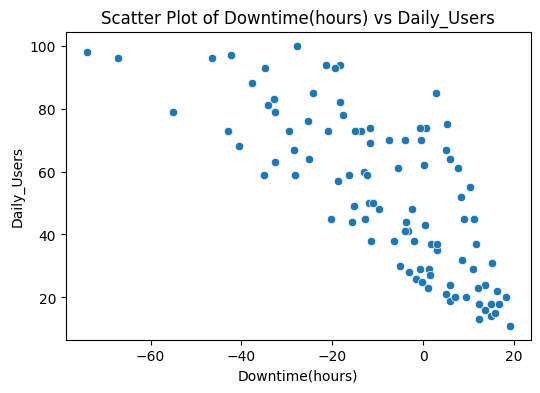

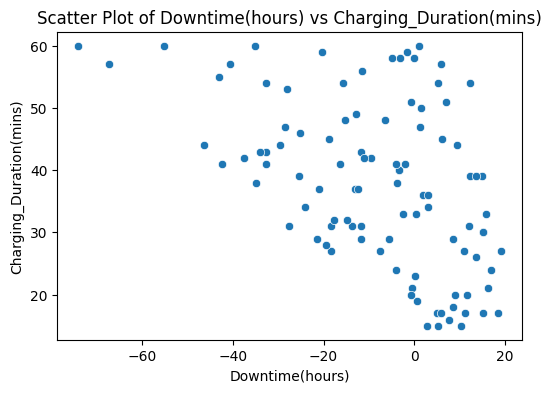

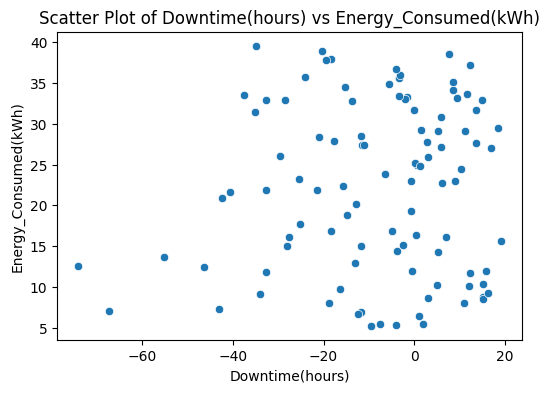

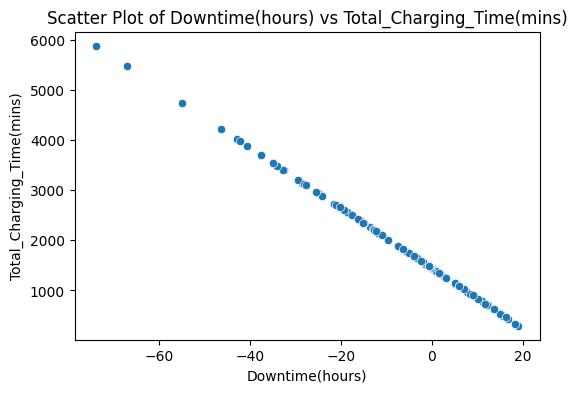

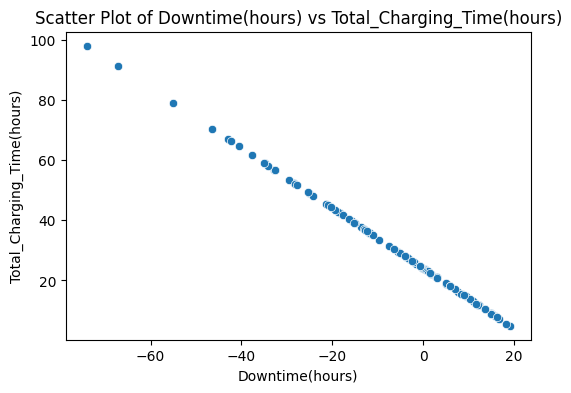

In [12]:
# Bivariate Analysis
print("\nBivariate Analysis:")
num_cols = df1.select_dtypes(include=['number']).columns
for col1 in num_cols:
    for col2 in num_cols:
        if col1 != col2:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df1[col1], y=df1[col2])
            plt.title(f"Scatter Plot of {col1} vs {col2}")
            plt.show()

#splitting


Usage Pattern Analysis:


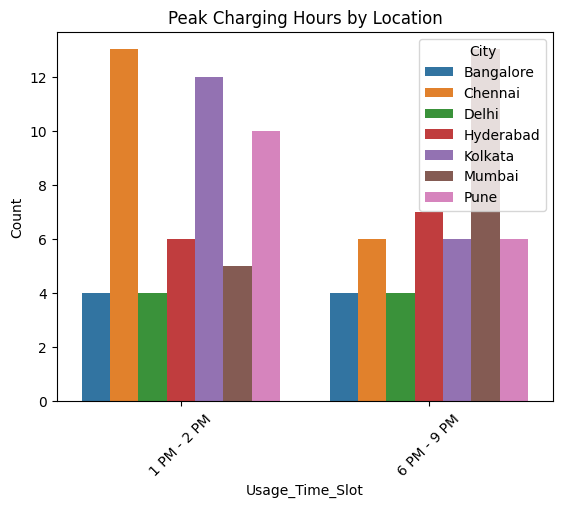

In [16]:
# Usage Pattern Analysis
print("\nUsage Pattern Analysis:")
# Extract peak charging hours
time_usage = df1.groupby(['City', 'Usage_Time_Slot']).size().reset_index(name='Count')
sns.barplot(data=time_usage, x='Usage_Time_Slot', y='Count', hue='City')
plt.xticks(rotation=45)
plt.title("Peak Charging Hours by Location")
plt.show()

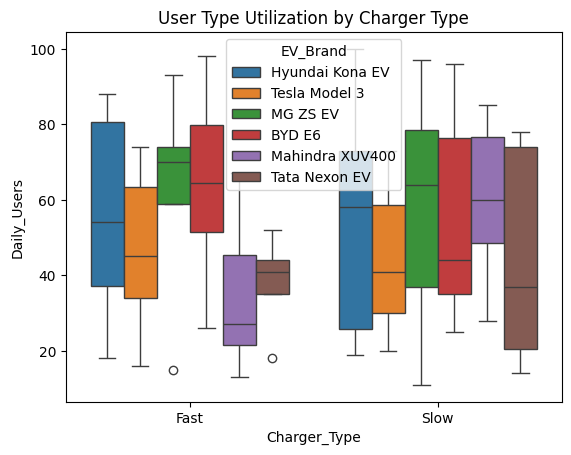

In [17]:
# Analyze User Type by Charger Type and EV Brand
sns.boxplot(data=df1, x='Charger_Type', y='Daily_Users', hue='EV_Brand')
plt.title("User Type Utilization by Charger Type")
plt.show()


In [18]:
# Efficiency & Performance Metrics
print("\nEfficiency Metrics:")
# Calculate Average Energy Consumption per Session
df1['Avg_Energy_per_Session'] = df1['Energy_Consumed(kWh)'] / df1['Daily_Users']
print(df1[['Charging_Station_ID', 'Avg_Energy_per_Session']].sort_values(by='Avg_Energy_per_Session', ascending=False))



Efficiency Metrics:
   Charging_Station_ID  Avg_Energy_per_Session
30             STN_031                2.348571
47             STN_048                2.068333
89             STN_090                1.982500
22             STN_023                1.658000
3              STN_004                1.624211
..                 ...                     ...
14             STN_015                0.109167
1              STN_002                0.100725
42             STN_043                0.100137
53             STN_054                0.077857
44             STN_045                0.073958

[100 rows x 2 columns]


In [19]:
# Identify Stations with Highest Downtime (low user activity)
downtime_stations = df1.sort_values(by=['Daily_Users', 'Charging_Duration(mins)'], ascending=[True, True])
print("\nStations with Highest Estimated Downtime:")
print(downtime_stations[['Charging_Station_ID', 'Daily_Users', 'Charging_Duration(mins)']].head())



Stations with Highest Estimated Downtime:
   Charging_Station_ID  Daily_Users  Charging_Duration(mins)
59             STN_060           11                       27
25             STN_026           13                       54
30             STN_031           14                       39
50             STN_051           15                       33
89             STN_090           16                       39


In [32]:
# Feature Engineering
# Convert Usage_Time_Slot to numerical categories
df1['Usage_Hour'] = df1['Usage_Time_Slot'].str.extract('(\d+)').astype(int)

# One-hot encoding for categorical features
categorical_features = ['City', 'Charger_Type']
numerical_features = ['Daily_Users', 'Charging_Duration(mins)', 'Charging_Price(INR/kWh)', 'Usage_Hour']

ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('num', scaler, numerical_features),
    ('cat', ohe, categorical_features)
])

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shivani\AppData\Local\Temp\ipykernel_1744\1861894461.py:3: SyntaxWarning: invalid escape sequence '\d'
  df1['Usage_Hour'] = df1['Usage_Time_Slot'].str.extract('(\d+)').astype(int)


#predicative analysis

In [34]:
# Define target
target = 'Energy_Consumed(kWh)'
X = df1[numerical_features + categorical_features]
y = df1[target]



In [35]:
X.shape, y.shape

((100, 6), (100,))

In [36]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Define models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Hyperparameter grids
grid_params = {
    'RandomForest': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [5, 10, 15]
    },
    'GradientBoosting': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__learning_rate': [0.05, 0.1, 0.2],
        'regressor__max_depth': [3, 6, 9]
    },
    'XGBoost': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__learning_rate': [0.05, 0.1, 0.2],
        'regressor__max_depth': [3, 6, 9]
    }
}

best_models = {}

# Train and evaluate models with hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ]), grid_params[name], cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    best_models[name] = {
        'model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'mae': -grid_search.best_score_
    }
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best MAE for {name}: {-grid_search.best_score_}")

# Select best model for deployment
best_model_name = min(best_models, key=lambda k: best_models[k]['mae'])
final_model = best_models[best_model_name]['model']
print(f"\nBest model for deployment: {best_model_name} with MAE {best_models[best_model_name]['mae']}")

Best Parameters for RandomForest: {'regressor__max_depth': 5, 'regressor__n_estimators': 100}
Best MAE for RandomForest: 9.578839992572115
Best Parameters for GradientBoosting: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Best MAE for GradientBoosting: 10.189401472686269
Best Parameters for XGBoost: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 6, 'regressor__n_estimators': 100}
Best MAE for XGBoost: 9.444221613142224

Best model for deployment: XGBoost with MAE 9.444221613142224


In [38]:
# Save the best model as a pickle file
with open("best_model.pkl", "wb") as f:
    pickle.dump(final_model, f)
print("Best model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'
